In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import os

In [3]:
data_dir = "../data/raw/pheme/"
dfs = {}
for f in os.listdir(data_dir):
    name = f.split(".")
    name = name[0]
    dfs[name] = pd.read_csv(os.path.join(data_dir, f))

<ipython-input-3-bb026dd3ece6>:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(os.path.join(data_dir, f))
<ipython-input-3-bb026dd3ece6>:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[name] = pd.read_csv(os.path.join(data_dir, f))


In [4]:
dfs.keys()

dict_keys(['charliehebdo', 'charliehebdo_thread', 'ebola-essien', 'ebola-essien_thread', 'ferguson', 'ferguson_thread', 'germanwings-crash', 'germanwings-crash_thread', 'gurlitt', 'gurlitt_thread', 'ottawashooting', 'ottawashooting_thread', 'prince-toronto', 'prince-toronto_thread', 'putinmissing', 'putinmissing_thread', 'sydneysiege', 'sydneysiege_thread'])

In [25]:
ottawa = dfs['ottawashooting']
ottowa_thread = dfs['ottawashooting_thread']
ids = ottowa_thread.thread.to_list()
ottawa = ottawa.loc[ottawa.thread.isin(ids)]

In [68]:
sample_net = ottawa.loc[(ottawa.thread == ids[0]) & (ottawa.is_source_tweet != 1)]
G = nx.from_pandas_edgelist(sample_net, "user_id", "in_reply_user", create_using=nx.DiGraph)

In [69]:
a = set(sample_net.user_id.unique())
b = set(sample_net.in_reply_user.unique())

In [70]:
a.union(b)

{15816550,
 18669387,
 18999969.0,
 19267038,
 26088254,
 96146974,
 172292855,
 347531577,
 400972999,
 582603780,
 1206639234,
 2433907530}

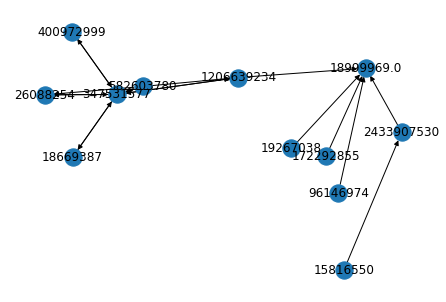

In [71]:
nx.draw(G, with_labels=True)

In [34]:
ottawa

,truth,title,is_rumor,thread,in_reply_tweet,event,tweet_id,is_source_tweet,in_reply_user,user_id,...,sentimentscore,Noun,Verb,Adjective,Pronoun,FirstPersonPronoun,SecondPersonPronoun,ThirdPersonPronoun,Adverb,has_url_in_text
0,NaN,NaN,0,524922078638903296,NaN,ottawashooting,524922078638903296,1,NaN,18999969,...,0.0625,10,2,1,0,0,0,0,0,0
1,NaN,NaN,0,524922078638903296,5.249221e+17,ottawashooting,524922392582586368,0,1.899997e+07,2433907530,...,0.0000,2,2,0,0,0,0,0,0,0
2,NaN,NaN,0,524922078638903296,5.249224e+17,ottawashooting,524922589861658624,0,2.433908e+09,15816550,...,0.0000,6,0,1,0,0,0,0,0,0
3,NaN,NaN,0,524922078638903296,5.249221e+17,ottawashooting,524922681595269120,0,1.899997e+07,1206639234,...,0.0625,12,2,2,0,0,0,0,0,0
4,NaN,NaN,0,524922078638903296,5.249227e+17,ottawashooting,524923071090917376,0,1.206639e+09,347531577,...,0.0000,12,3,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,true,The suspect's name is Michael Zehaf-Bibeau,1,525072912957452289,5.250994e+17,ottawashooting,525100575852343297,0,1.001507e+08,930938779,...,0.0000,6,6,0,0,0,0,0,0,0
12280,true,The suspect's name is Michael Zehaf-Bibeau,1,525072912957452289,5.251006e+17,ottawashooting,525100743146352640,0,9.309388e+08,100150714,...,-0.1250,6,2,0,0,0,0,0,0,0
12281,true,The suspect's name is Michael Zehaf-Bibeau,1,525072912957452289,5.250731e+17,ottawashooting,525102255515922432,0,1.194418e+08,322148870,...,0.8000,6,1,1,0,0,0,1,0,0
12282,true,The suspect's name is Michael Zehaf-Bibeau,1,525072912957452289,5.251020e+17,ottawashooting,525102464773931008,0,4.561463e+08,100150714,...,0.0000,9,3,3,1,0,0,1,0,0


In [22]:
ottowa_thread

,thread,favorite_count_mean,favorite_count_sum,favorite_count_var,user_mentions_mean,user_mentions_sum,user_mentions_var,media_count_mean,media_count_sum,media_count_var,...,src.listed_count,src.user_verified,created,src.created_at,src.tweets_total,first_resp,last_resp,resp_var,time_to_first_resp,time_to_last_resp
0,524922078638903296,0.411765,21,8.647059,1.882353,96,0.745882,0.000000,0,0.000000,...,1661,0,1.413986e+12,1.231973e+12,38424,1.413986e+12,1.413994e+12,5.523544e+12,75000.0,7677000.0
1,524922499466022913,1.125000,18,20.250000,1.562500,25,0.662500,0.250000,4,0.200000,...,1594,0,1.413986e+12,1.231973e+12,38159,1.413986e+12,1.414000e+12,1.044042e+13,110000.0,13249000.0
2,524922507380670464,3.428571,24,74.619048,1.000000,7,0.333333,0.000000,0,0.000000,...,5251,1,1.413986e+12,1.232053e+12,25502,1.413986e+12,1.413988e+12,2.438862e+11,58000.0,1482000.0
3,524922729485848576,0.567568,21,2.974474,1.297297,48,0.381381,0.054054,2,0.052553,...,73,0,1.413986e+12,1.244141e+12,22152,1.413986e+12,1.414010e+12,7.146185e+13,90000.0,24099000.0
4,524923148576518144,1.913043,44,39.628458,2.043478,47,1.134387,0.086957,2,0.083004,...,695,1,1.413986e+12,1.255099e+12,5184,1.413986e+12,1.414041e+12,3.072803e+14,36000.0,54232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,525070912199335937,9.714286,68,554.238095,1.857143,13,1.476190,0.000000,0,0.000000,...,44,0,1.414022e+12,1.275085e+12,1636,1.414022e+12,1.414036e+12,3.355043e+13,585000.0,14398000.0
853,525070933556350977,9.600000,192,1704.884211,1.200000,24,0.273684,0.150000,3,0.134211,...,280,0,1.414022e+12,1.312835e+12,32601,1.414022e+12,1.414032e+12,1.082636e+13,194000.0,9996000.0
854,525071376084791297,7.071429,99,655.302198,0.928571,13,0.071429,0.571429,8,0.263736,...,418,1,1.414022e+12,1.237436e+12,28103,1.414022e+12,1.414029e+12,3.738392e+12,69000.0,6829000.0
855,525071638464049152,2.666667,32,64.060606,1.916667,23,0.446970,0.083333,1,0.083333,...,5311,1,1.414022e+12,1.232053e+12,25591,1.414022e+12,1.414028e+12,2.839184e+12,128000.0,6217000.0


In [6]:
ottawa.columns

Index(['truth', 'title', 'is_rumor', 'thread', 'in_reply_tweet', 'event',
       'tweet_id', 'is_source_tweet', 'in_reply_user', 'user_id',
       'tweet_length', 'symbol_count', 'user_mentions', 'urls_count',
       'media_count', 'hashtags_count', 'retweet_count', 'favorite_count',
       'mentions_count', 'is_truncated', 'created', 'has_smile_emoji',
       'sensitive', 'has_place', 'has_coords', 'has_quest', 'has_exclaim',
       'has_quest_or_exclaim', 'user.tweets_count', 'user.verified',
       'user.followers_count', 'user.listed_count', 'user.desc_length',
       'user.handle_length', 'user.name_length', 'user.notifications',
       'user.friends_count', 'user.time_zone', 'user.has_bg_img',
       'user.default_pic', 'user.created_at', 'user.location',
       'user.profile_sbcolor', 'user.profile_bgcolor', 'hasperiod',
       'number_punct', 'negativewordcount', 'positivewordcount',
       'capitalratio', 'contentlength', 'sentimentscore', 'Noun', 'Verb',
       'Adjective', '

In [31]:
print(ottowa_thread.columns.to_list())

['thread', 'favorite_count_mean', 'favorite_count_sum', 'favorite_count_var', 'user_mentions_mean', 'user_mentions_sum', 'user_mentions_var', 'media_count_mean', 'media_count_sum', 'media_count_var', 'sensitive_mean', 'sensitive_sum', 'sensitive_var', 'has_place_mean', 'has_place_sum', 'has_place_var', 'has_coords_mean', 'has_coords_sum', 'has_coords_var', 'retweet_count_mean', 'retweet_count_sum', 'retweet_count_var', 'hashtags_count_mean', 'hashtags_count_sum', 'hashtags_count_var', 'hashtags_count_shared', 'urls_count_mean', 'urls_count_sum', 'urls_count_var', 'user.tweets_count_mean', 'user.tweets_count_sum', 'user.tweets_count_var', 'is_rumor', 'thread_length', 'user.has_bg_img_mean', 'user.has_bg_img_sum', 'user.has_bg_img_var', 'has_quest_mean', 'has_quest_sum', 'has_quest_var', 'has_exclaim_mean', 'has_exclaim_sum', 'has_exclaim_var', 'has_quest_or_exclaim_mean', 'has_quest_or_exclaim_sum', 'has_quest_or_exclaim_var', 'user.default_pic_mean', 'user.default_pic_sum', 'user.defau